In [98]:
#random number
from random import seed
from random import random 
#numerical
import pandas as pd
import numpy as np
import pandas.util.testing as tm
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
#to plot the diagrams within the cells
%matplotlib inline


In [99]:
pd.set_option('display.max_rows',1000)


In [100]:
df=pd.read_csv('https://raw.githubusercontent.com/shahazadaTalib/Data-Analysis/main/kc_houase/kc_house_data.csv')
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [102]:
df.drop(['Unnamed: 0', 'id'],axis=1,inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [104]:
df['date'][1]

'20141209T000000'

In [105]:
date=df['date'][1][:8]

In [106]:
def dateFormate(column):
  for i in column:
    i=i[:8]
  column=pd.to_datetime(column)
  return column

df['date']=dateFormate(df['date'])

In [107]:
df['yr_Old']=df['date'].dt.year-df['yr_built']

In [108]:
df.drop('date',axis=1,inplace=True)

In [109]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Old
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [111]:
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()
col_name = df.drop(['price'],axis=1).columns[:]
x=df.loc[:,col_name]
y==df['price']

x=pd.DataFrame(data=min_max_scaler.fit_transform(x),columns=col_name)

print(df.head())
x.head()

      price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  yr_Old
0  221900.0         3       1.00  ...           1340        5650      59
1  538000.0         3       2.25  ...           1690        7639      63
2  180000.0         2       1.00  ...           2720        8062      82
3  604000.0         4       3.00  ...           1360        5000      49
4  510000.0         3       2.00  ...           1800        7503      28

[5 rows x 20 columns]


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Old
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.517241
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027,0.551724
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513,0.715517
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996,0.431034
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871,0.250000


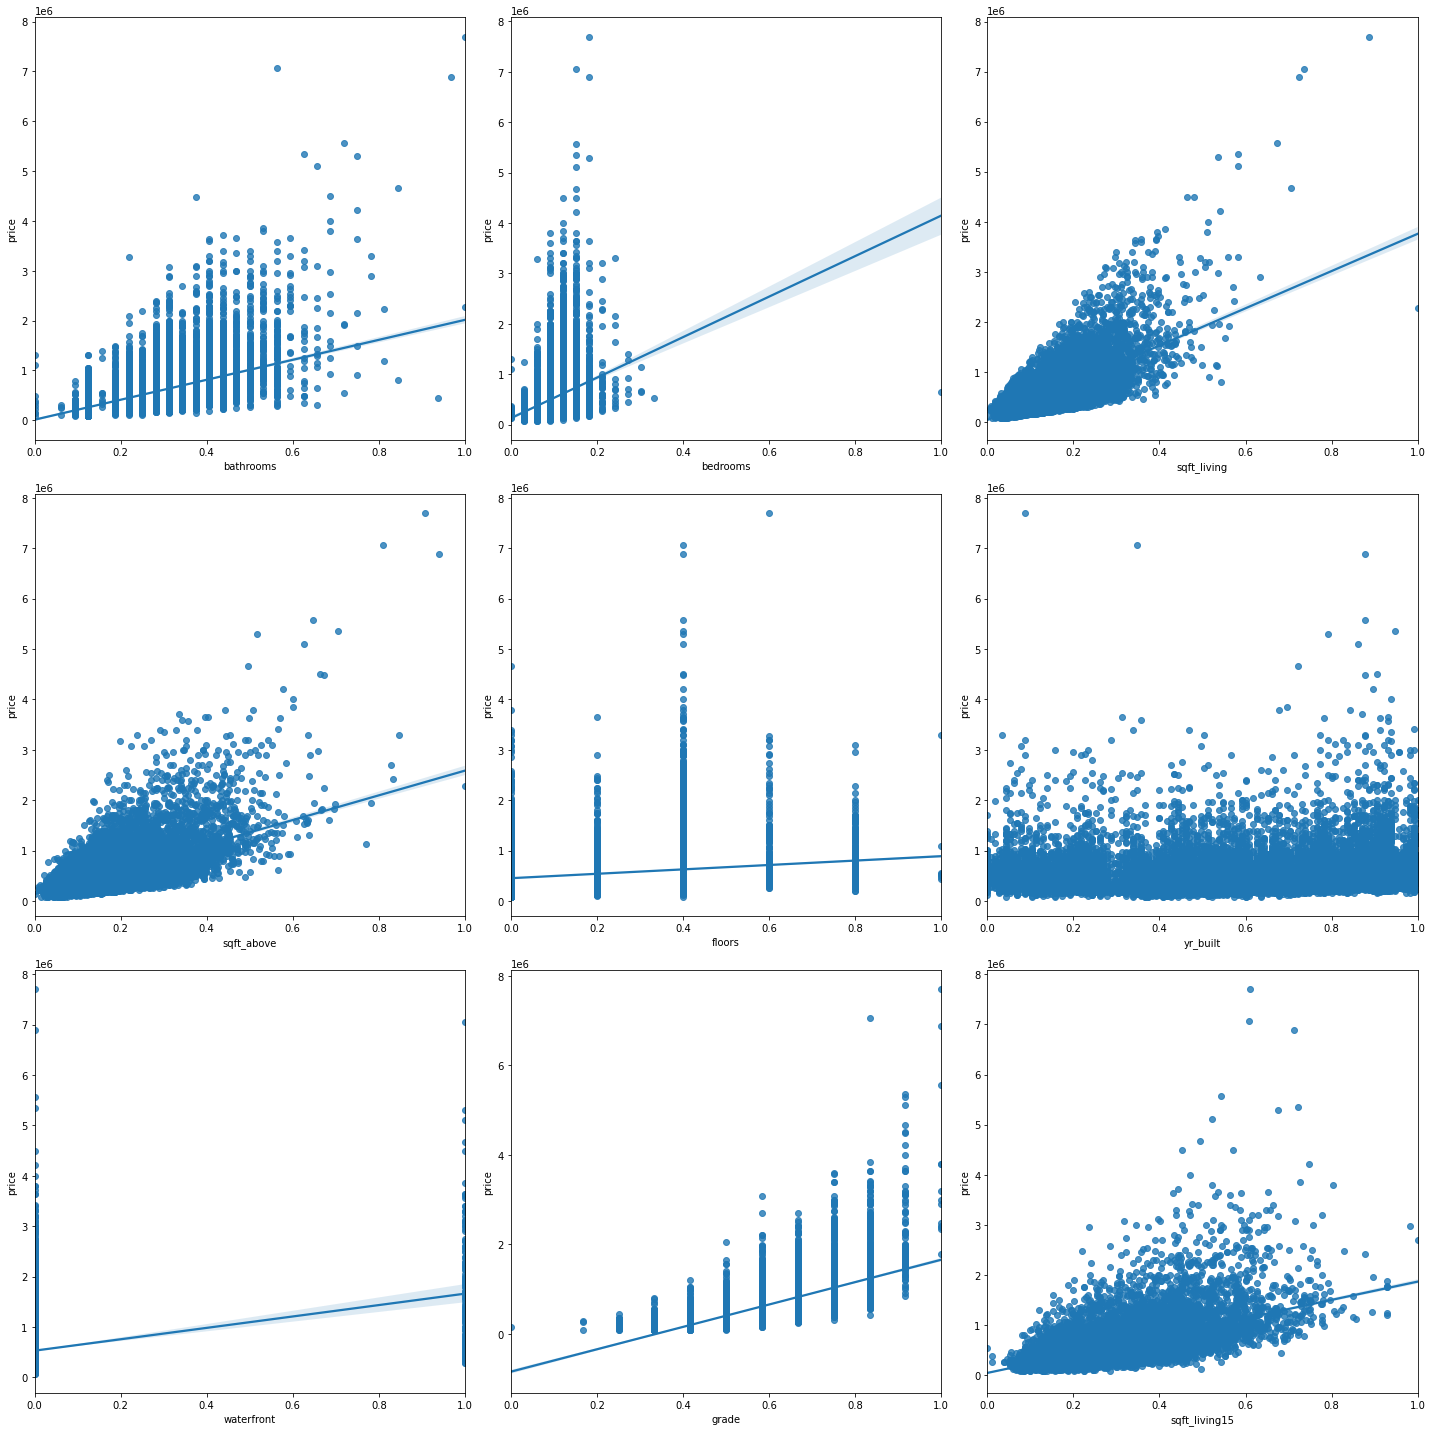

In [112]:
fig,axs=plt.subplots(ncols=3,nrows=3,figsize=(20,20))
sns.regplot(y=df['price'],x=x['bathrooms'],ax=axs[0,0])
sns.regplot(y=df['price'],x=x['bedrooms'],ax=axs[0,1])
sns.regplot(y=df['price'],x=x['sqft_living'],ax=axs[0,2])
sns.regplot(y=df['price'],x=x['sqft_above'],ax=axs[1,0])
sns.regplot(y=df['price'],x=x['floors'],ax=axs[1,1])
sns.regplot(y=df['price'],x=x['yr_built'],ax=axs[1,2])
sns.regplot(y=df['price'],x=x['waterfront'],ax=axs[2,0])
sns.regplot(y=df['price'],x=x['grade'],ax=axs[2,1])
sns.regplot(y=df['price'],x=x['sqft_living15'],ax=axs[2,2])
plt.tight_layout()







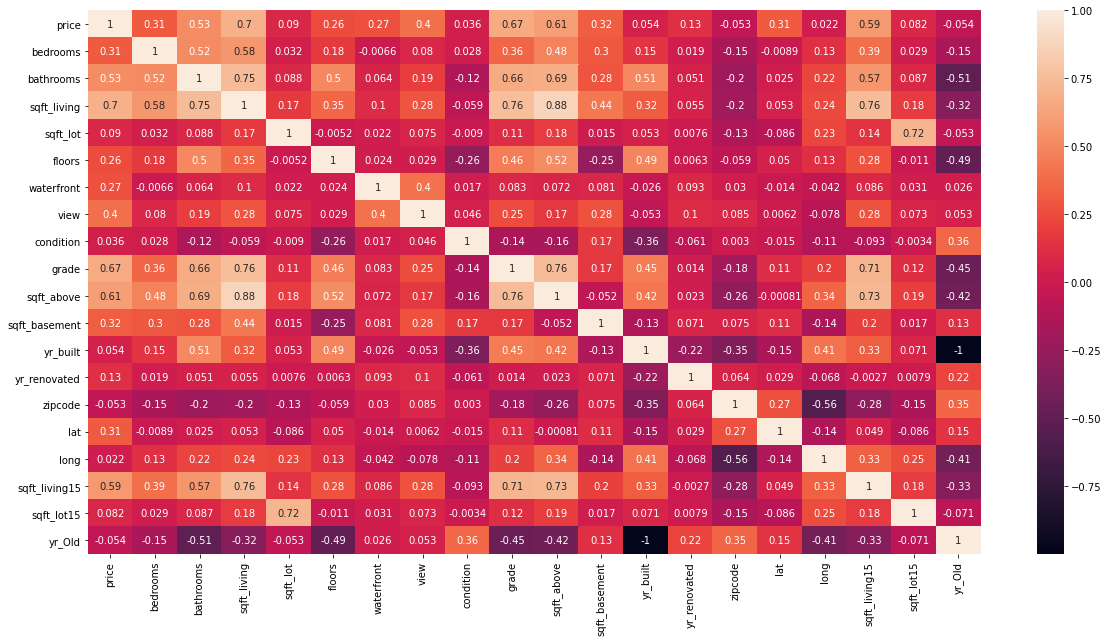

In [113]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [114]:
features=df.drop('price',axis=1)
target=df['price']
train_features,test_features,train_target,test_target=train_test_split(features,target,test_size=0.2,random_state=5)
print('Train features shape:',train_features.shape)
print('Train target shape:',train_target.shape)
print('Test features shape:',test_features.shape)
print('Test target shape:',test_target.shape)

Train features shape: (17290, 19)
Train target shape: (17290,)
Test features shape: (4323, 19)
Test target shape: (4323,)


In [115]:
model = LinearRegression(normalize = True)
model.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [116]:
print('Model intercept:',model.intercept_,'\n')
print("Model coefficient:",model.coef_,'\n')

for i in range(len(features.columns)):
  print(features.columns[i],":",model.coef_[i])

Model intercept: -51417833.18262513 

Model coefficient: [-3.43879416e+04  4.00090492e+04 -2.85685371e+03  1.21791462e-01
  5.81680882e+03  5.81889068e+05  5.30739184e+04  2.83942466e+04
  9.66075429e+04  3.03871574e+03  3.00659136e+03  2.53018381e+04
  2.60163750e+01 -5.55775540e+02  6.04492190e+05 -2.07820886e+05
  2.01014849e+01 -3.77530891e-01  2.79316927e+04] 

bedrooms : -34387.94163388316
bathrooms : 40009.04921404188
sqft_living : -2856.853713272578
sqft_lot : 0.12179146194405802
floors : 5816.808816957229
waterfront : 581889.0684189018
view : 53073.9184308674
condition : 28394.2465688825
grade : 96607.5429186807
sqft_above : 3038.715738887874
sqft_basement : 3006.591361889169
yr_built : 25301.838124205442
yr_renovated : 26.01637495421629
zipcode : -555.7755396473716
lat : 604492.189911678
long : -207820.88623700623
sqft_living15 : 20.101484892563903
sqft_lot15 : -0.37753089134753537
yr_Old : 27931.692687334584


In [117]:
#model evaluation for trianing set
train_target_pred=model.predict(train_features)
rmse=(np.sqrt(mean_squared_error(train_target,train_target_pred)))
r2=r2_score(train_target,train_target_pred)

#examine the first 10 predicted output from the model
output=pd.DataFrame(train_target[0:10])
output['Predicted']=train_target_pred[0:10]
output['Difference']=output['Predicted']-output['price']
print(output,'\n')

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#Model evaluation for testing set
test_target_pred=model.predict(test_features)
rmse=(np.sqrt(mean_squared_error(test_target,test_target_pred)))
r2=r2_score(test_target,test_target_pred)

output=pd.DataFrame(test_target[0:10])
output['Predicted']=test_target_pred[0:10]
output['Difference']=output['Predicted']-output['price']
print(output,'\n')

print("MOdel testing performance")
print('RMSE is {}'.format(rmse))
print("R2 score is {}".format(r2))

           price     Predicted     Difference
3856    535000.0  6.739341e+05  138934.090251
5010    425000.0  3.058559e+05 -119144.102005
18050   800000.0  1.033264e+06  233263.800863
570     338900.0  1.697501e+05 -169149.884038
8556   1110000.0  1.112673e+06    2673.493223
19435   333000.0  4.703968e+05  137396.824396
16918   830000.0  8.034330e+05  -26567.034348
21010   525000.0  5.782473e+05   53247.339476
6156    375000.0  3.585699e+05  -16430.147922
10074   333760.0  3.666309e+05   32870.910522 

Model training performance:
---------------------------
RMSE is 200593.8982552755
R2 score is 0.7008942463296544


          price     Predicted     Difference
17485  365000.0  4.193293e+05   54329.284173
15164  225000.0  1.158531e+05 -109146.880847
18449  384950.0  4.740355e+05   89085.455120
6828   657500.0  5.809705e+05  -76529.509141
18281  959000.0  1.216866e+06  257866.219630
14625  855000.0  8.740987e+05   19098.662499
14864  575000.0  6.307564e+05   55756.409882
17257  856500.0  